In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

# settings
n_repeat = 50
n_train = 50
n_test = 1000
noise = 0.1
np.random.seed(0)

In [2]:
estimators = [("Tree", DecisionTreeRegressor()), ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

In [3]:
n_estimators = len(estimators)

In [4]:
# generate data
def f(x):
    x = x.ravel()
    return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 -5
    X = np.sort(X)
    
    if n_repeat ==1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))
        
        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples,1))
    
    return X,y

Tree: 0.0241 (error) = 0.0003 (bias^2) + 0.0138 (var)+0.0098 (noise)
Bagging(Tree): 0.0190 (error) = 0.0004 (bias^2) + 0.0086 (var)+0.0098 (noise)


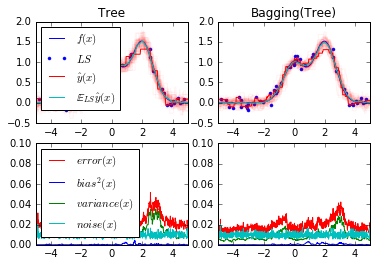

In [7]:
X_train = []
y_train = []

for i in range(n_repeat):
    X,y = generate(n_samples = n_train, noise= noise)
    X_train.append(X)
    y_train.append(y)
    
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

# estimator간의 비교를 위한 for loop
for n, (name, estimator) in enumerate(estimators):
    y_predict = np.zeros((n_test, n_repeat))
    
    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)
    
    y_error = np.zeros(n_test) # Bias^2+Variance(분산)+Noise(잡음)
    
    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j]- y_predict[:, i]) ** 2
        
    y_error /= (n_repeat * n_repeat)
    
    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)
    
    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) + {3:.4f} (var)+{4:.4f} (noise)".format(name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)))
    
    plt.subplot(2, n_estimators, n+1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="$LS ~ %y = f(x)+noise$")
    
    for i in range(n_repeat):
        if i==0:
            plt.plot(X_test, y_predict[:,i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:,i], "r", alpha=0.05)
    
    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label="$\mathbb{E}_{LS} \^y(x)$")
    plt.xlim([-5, 5])
    plt.title(name)
    
    if n==0:
        plt.legend(loc="upper left", prop={"size" : 11})
        
    plt.subplot(2, n_estimators, n_estimators + n+1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$")
    plt.plot(X_test, y_var, "g", label="$variance(x)$")
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")
    
    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])
    
    if n==0:
        plt.legend(loc="upper left", prop={"size" : 11})
        
plt.show()